# Humana Mays Healthcare Analytics  

## Medical Claims EDA

Arjun Bingly

In [210]:
import pandas
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [211]:
data_path = os.getcwd()+'/data'
data_filenames = os.listdir(data_path)
data_filenames = [filename for filename in data_filenames if filename.endswith('.csv')]
print(data_filenames)

['rxclms_holdout.csv', 'target_train.csv', 'target_holdout.csv', 'race_cd_desc.csv', 'medclms_holdout.csv', 'medclms_train.csv', 'data_dictionary.csv', 'rxclms_train.csv']


In [212]:
medclms_df = pd.read_csv(f'{data_path}/medclms_train.csv')
medclms_df.columns

Index(['therapy_id', 'medclm_key', 'clm_unique_key', 'primary_diag_cd',
       'visit_date', 'diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5',
       'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9', 'process_date',
       'reversal_ind', 'pot', 'util_cat', 'hedis_pot', 'clm_type',
       'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis',
       'fatigue_diagnosis', 'nausea_diagnosis', 'hyperglycemia_diagnosis',
       'constipation_diagnosis', 'diarrhea_diagnosis'],
      dtype='object')

In [213]:
len(medclms_df)

100159

### Primary Diagnosis : *primary_diag_cd*

In [214]:
primary_diag_count = medclms_df.primary_diag_cd.value_counts()
primary_diag_count # freq

C3490    7517
C3411    5606
C3412    3847
C3432    3458
C3431    3429
         ... 
G43B0       1
F1911       1
M5410       1
I2601       1
R7401       1
Name: primary_diag_cd, Length: 1861, dtype: int64

In [215]:
primary_diag_count.sort_index()

2961       1
36000      2
A09        1
A310       5
A403       2
          ..
Z978       2
Z981      15
Z982       2
Z98890    44
Z9989      1
Name: primary_diag_cd, Length: 1861, dtype: int64

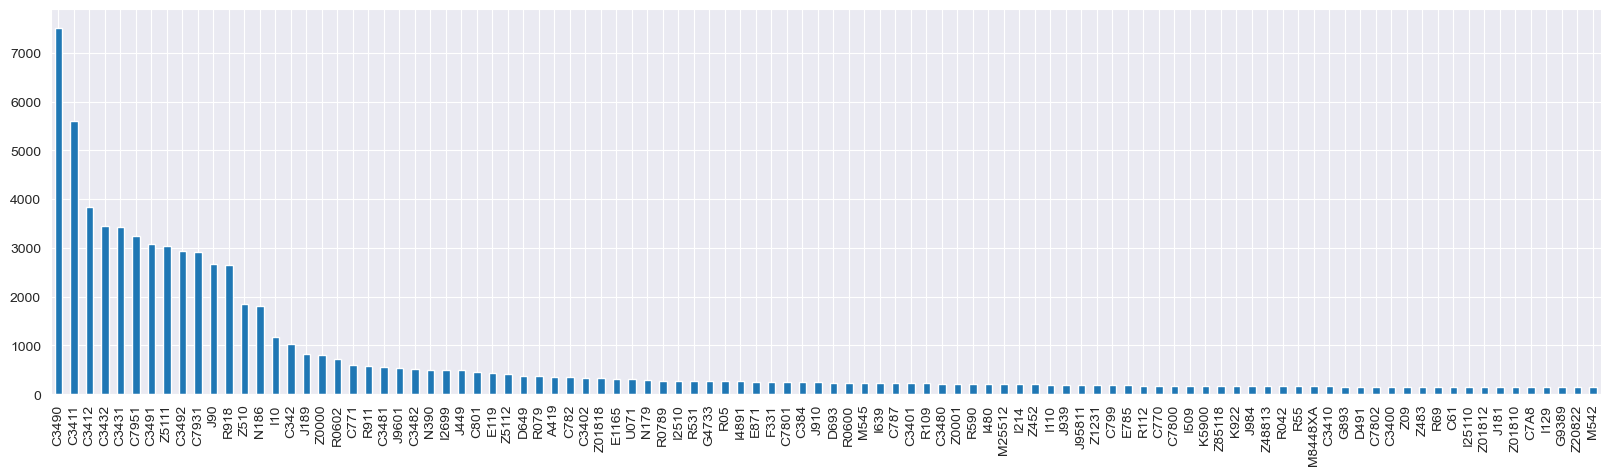

In [216]:
plt.figure(figsize=(20,5))
primary_diag_count[:100].plot.bar()
plt.show()

In [217]:
import simple_icd_10_cm as icd

In [218]:
for diag_code in primary_diag_count.index[:10]:
    print(f'{diag_code}:{icd.get_description(diag_code)}')

C3490:Malignant neoplasm of unspecified part of unspecified bronchus or lung
C3411:Malignant neoplasm of upper lobe, right bronchus or lung
C3412:Malignant neoplasm of upper lobe, left bronchus or lung
C3432:Malignant neoplasm of lower lobe, left bronchus or lung
C3431:Malignant neoplasm of lower lobe, right bronchus or lung
C7951:Secondary malignant neoplasm of bone
C3491:Malignant neoplasm of unspecified part of right bronchus or lung
Z5111:Encounter for antineoplastic chemotherapy
C3492:Malignant neoplasm of unspecified part of left bronchus or lung
C7931:Secondary malignant neoplasm of brain


In [219]:
icd.get_description('C3411')

'Malignant neoplasm of upper lobe, right bronchus or lung'

In [220]:
icd.get_parent('C3411')

'C34.1'

In [221]:
icd.get_ancestors('C3411')

['C34.1', 'C34', 'C30-C39', '2']

In [222]:
icd.get_descendants('C3411')

[]

In [223]:
medclms_df["primary_diag_cd"] = list(map(icd.get_parent, medclms_df.primary_diag_cd))

ValueError: The code "M5450" does not exist.

In [224]:
primary_diag = []
for diag_code in medclms_df.primary_diag_cd:
    primary_diag.append([diag_code, diag_code[:3]])
primary_diag = pd.DataFrame(primary_diag, columns=['diag_code', 'diag_code_parent'])

In [225]:
primary_diag.diag_code_parent.value_counts()

C34    33116
C79     6666
Z51     5533
R91     3238
J90     2673
       ...  
S93        1
E20        1
H69        1
I75        1
L24        1
Name: diag_code_parent, Length: 634, dtype: int64

Find ICD-9 codes:

In [226]:
icd_10_compliance = []
for diag_code in medclms_df.primary_diag_cd.unique():
    if diag_code[0].isdigit():
        icd_10_compliance.append([diag_code, False])
    else: icd_10_compliance.append([diag_code, True])
icd_10_compliance = pd.DataFrame(icd_10_compliance, columns=['diag_cd', 'compliance'])

In [227]:
icd_10_compliance.loc[icd_10_compliance.compliance == False]

,diag_cd,compliance
523,36000,False
1805,2961,False


| ICD-9  | Desc                                  | ICD-10  | Desc                                                  |
|--------|---------------------------------------|---------|-------------------------------------------------------|
| 360.00 | Purulent endophthalmitis, unspecified | H44.009 | Unspecified purulent endophthalmitis, unspecified eye |
| 296.1  | Manic disorder, recurrent episode     | ----    | ----                                                  |

In [228]:
medclms_df.loc[medclms_df.primary_diag_cd == '2961']

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
87791,1012918344-TAGRISSO-1,40778041625,804628000483283203,2961,2022-06-09T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0


In [229]:
medclms_df.loc[medclms_df.primary_diag_cd == '2961'].therapy_id

87791    1012918344-TAGRISSO-1
Name: therapy_id, dtype: object

In [230]:
medclms_df.loc[medclms_df.therapy_id == list(medclms_df.loc[medclms_df.primary_diag_cd == '2961'].therapy_id)[0] ].sort_values('visit_date')

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
8607,1012918344-TAGRISSO-1,40753329107,875267000478972003,C3401,2021-04-05T00:00:00.000Z,D701,G629,T451X5A,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
73206,1012918344-TAGRISSO-1,39849537989,109929000481752103,C44519,2021-08-25T00:00:00.000Z,C4359,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
89544,1012918344-TAGRISSO-1,39866462489,854208000480442103,C44519,2021-08-25T00:00:00.000Z,C4359,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
21409,1012918344-TAGRISSO-1,39866462488,854208000480442103,C44519,2021-08-25T00:00:00.000Z,C4359,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
27780,1012918344-TAGRISSO-1,39849537988,109929000481752103,C44519,2021-08-25T00:00:00.000Z,C4359,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61315,1012918344-TAGRISSO-1,41438915131,549106000484332203,I639,2022-09-27T00:00:00.000Z,R531,R29708,Z9119,E785,I10,...,Other,med,1,0,0,1,0,0,0,0
61431,1012918344-TAGRISSO-1,41438915135,549106000484332203,I639,2022-09-27T00:00:00.000Z,R531,R29708,Z9119,E785,I10,...,Other,med,1,0,0,1,0,0,0,0
61452,1012918344-TAGRISSO-1,41438915127,549106000484332203,I639,2022-09-27T00:00:00.000Z,R531,R29708,Z9119,E785,I10,...,Other,med,1,0,0,1,0,0,0,0
68689,1012918344-TAGRISSO-1,41438915126,549106000484332203,I639,2022-09-27T00:00:00.000Z,R531,R29708,Z9119,E785,I10,...,Other,med,1,0,0,1,0,0,0,0


In [231]:
medclms_df.loc[medclms_df.primary_diag_cd == '36000']

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
2567,1098307503-TAGRISSO-1,39144456928,933102000480633301,36000,2021-07-04T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
70543,1098307503-TAGRISSO-1,39131356833,39381000480353301,36000,2021-07-04T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0


In [232]:
medclms_df.loc[medclms_df.therapy_id == list(medclms_df.loc[medclms_df.primary_diag_cd == '36000'].therapy_id)[0] ].sort_values('visit_date')

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
9518,1098307503-TAGRISSO-1,39267027665,31602000480823301,Z0000,2021-03-16T00:00:00.000Z,E1142,C029,E538,C4442,I2510,...,Other,med,0,0,0,0,0,0,0,0
41733,1098307503-TAGRISSO-1,39267027668,131602000480823301,Z0000,2021-03-16T00:00:00.000Z,Z1211,Z1159,Z1329,Z125,Z794,...,Other,med,0,0,0,0,0,0,0,0
86312,1098307503-TAGRISSO-1,39267027669,131602000480823301,Z0000,2021-03-16T00:00:00.000Z,Z1211,Z1159,Z1329,Z125,Z794,...,Other,med,0,0,0,0,0,0,0,0
1176,1098307503-TAGRISSO-1,38836677819,870412000480003301,Z1211,2021-03-16T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
47949,1098307503-TAGRISSO-1,39267027663,31602000480823301,Z0000,2021-03-16T00:00:00.000Z,E1142,C029,E538,C4442,I2510,...,Other,med,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17033,1098307503-TAGRISSO-1,40375465362,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
43422,1098307503-TAGRISSO-1,40375465359,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
72590,1098307503-TAGRISSO-1,40375465358,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
86616,1098307503-TAGRISSO-1,40375418044,136112000482373301,C760,2022-03-16T00:00:00.000Z,I491,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0


In [233]:
medclms_df.loc[medclms_df.therapy_id == list(medclms_df.loc[medclms_df.primary_diag_cd == '36000'].therapy_id)[1] ].sort_values('visit_date')

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
9518,1098307503-TAGRISSO-1,39267027665,31602000480823301,Z0000,2021-03-16T00:00:00.000Z,E1142,C029,E538,C4442,I2510,...,Other,med,0,0,0,0,0,0,0,0
41733,1098307503-TAGRISSO-1,39267027668,131602000480823301,Z0000,2021-03-16T00:00:00.000Z,Z1211,Z1159,Z1329,Z125,Z794,...,Other,med,0,0,0,0,0,0,0,0
86312,1098307503-TAGRISSO-1,39267027669,131602000480823301,Z0000,2021-03-16T00:00:00.000Z,Z1211,Z1159,Z1329,Z125,Z794,...,Other,med,0,0,0,0,0,0,0,0
1176,1098307503-TAGRISSO-1,38836677819,870412000480003301,Z1211,2021-03-16T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
47949,1098307503-TAGRISSO-1,39267027663,31602000480823301,Z0000,2021-03-16T00:00:00.000Z,E1142,C029,E538,C4442,I2510,...,Other,med,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17033,1098307503-TAGRISSO-1,40375465362,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
43422,1098307503-TAGRISSO-1,40375465359,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
72590,1098307503-TAGRISSO-1,40375465358,734802000482433301,C760,2022-03-09T00:00:00.000Z,C7951,R001,C3490,Z87891,Z803,...,Other,med,0,0,0,0,0,0,0,0
86616,1098307503-TAGRISSO-1,40375418044,136112000482373301,C760,2022-03-16T00:00:00.000Z,I491,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0


 - Since the rows containing ICD-9 codes are all NaNs and since they occur only three times, removing these rows
  - The therapy_id of the associated primary_diag_cd seems intact.

In [234]:
dropindex = medclms_df[ (medclms_df.primary_diag_cd == '36000') | (medclms_df.primary_diag_cd == '2961') ].index
dropindex

Int64Index([2567, 70543, 87791], dtype='int64')

In [235]:
medclms_df = medclms_df.drop(dropindex)

- Adding a column, *primary_diag_parent_cd*    :3 char parent code of the primary diagnosis code.

In [236]:
#sanity check
medclms_df[ (medclms_df.primary_diag_cd == '36000') | (medclms_df.primary_diag_cd == '2961') ].shape

(0, 27)

In [237]:
medclms_df['primary_diag_parent_cd'] = medclms_df.primary_diag_cd.apply(lambda diag_cd : diag_cd[:3] )

In [242]:
medclms_df.primary_diag_parent_cd.unique().shape

(632,)

In [342]:
def icd_get_block(diag_code: str) -> str:
    if len(diag_code) > 3:
        raise ValueError
    elif diag_code[0] in ['A','B']:
        return('A00-B99')
    elif (diag_code[0] == 'C') or (diag_code[:2] in ['D0', 'D1', 'D2', 'D3', 'D4']):
        return ('C00-D49')
    elif diag_code[:2] in ['D5', 'D6', 'D7', 'D8']:
        return ('D50-D89')
    elif diag_code[0]=='E':
        return ('E00-E89')
    elif diag_code[0]=='F':
        return ('F01-F99')
    elif diag_code[0]=='G':
        return ('G00-G99')
    elif diag_code[0]=='H' and int(diag_code[1])>=5:
        return ('H00-H59')
    elif diag_code[0]=='H' and int(diag_code[1])<5:
        return ('H60-H95')
    elif diag_code[0]=='I':
        return ('I00-I99')
    elif diag_code[0]=='J':
        return ('J00-J99')
    elif diag_code[0]=='K':
        return ('K00-K95')
    elif diag_code[0]=='L':
        return ('L00-L99')
    elif diag_code[0]=='M':
        return ('M00-M99')
    elif diag_code[0]=='N':
        return ('N00-N99')
    elif diag_code[0]=='O':
        return ('O00-O9A')
    elif diag_code[0]=='P':
        return ('P00-P96')
    elif diag_code[0]=='Q':
        return ('Q00-Q99')
    elif diag_code[0]=='R':
        return ('R00-R99')
    elif diag_code[0] in ['S','T']:
        return ('S00-T88')
    elif diag_code[0]=='U':
        return ('U00-U85')
    elif diag_code[0] in ['V', 'W', 'X', 'Y']:
        return ('V00-Y99')
    elif diag_code[0] == 'Z':
        return ('Z00-Z99')
    else:
        raise ValueError(diag_code)

In [343]:
primary_diag_block = np.array([[diag_code, icd_get_block(diag_code)] for diag_code in medclms_df.primary_diag_parent_cd.unique()])

In [344]:
primary_diag_block

array([['I70', 'I00-I99'],
       ['J96', 'J00-J99'],
       ['E78', 'E00-E89'],
       ...,
       ['A87', 'A00-B99'],
       ['M24', 'M00-M99'],
       ['L24', 'L00-L99']], dtype='<U7')

In [345]:
max(primary_diag_block[:,1], key=len)

'I00-I99'

In [346]:
min(primary_diag_block[:,1], key=len)

'I00-I99'

In [347]:
[[child, parent] for child,parent in primary_diag_block if len(parent)==3]

[]

In [354]:
pd.Series(primary_diag_block[:,1]).unique().shape

(19,)

In [358]:
pd.Series(primary_diag_block[:,1]).unique()

array(['I00-I99', 'J00-J99', 'E00-E89', 'C00-D49', 'R00-R99', 'D50-D89',
       'Z00-Z99', 'G00-G99', 'M00-M99', 'K00-K95', 'N00-N99', 'F01-F99',
       'H60-H95', 'L00-L99', 'S00-T88', 'H00-H59', 'A00-B99', 'Q00-Q99',
       'U00-U85'], dtype=object)

In [360]:
medclms_df['primary_diag_group_cd'] = medclms_df.primary_diag_parent_cd.apply(icd_get_block)

In [361]:
medclms_df

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,primary_diag_parent_cd,primary_diag_group_cd
0,1066310426-TAGRISSO-1,35908472910,649143000473431803,I70292,2019-09-10T00:00:00.000Z,I771,I739,R9431,Z7982,Z79899,...,0,0,0,0,0,0,0,0,I70,I00-I99
1,1094522162-TAGRISSO-1,37189420103,934834000476811903,J9601,2020-08-21T00:00:00.000Z,J910,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,J96,J00-J99
2,1104741185-TAGRISSO-1,37128499255,748244100476652103,E785,2020-07-14T00:00:00.000Z,I10,J324,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,E78,E00-E89
3,1012749208-TAGRISSO-1,36269844999,589034000474672103,C3492,2020-02-04T00:00:00.000Z,I825Z9,T83518A,N390,J942,J910,...,0,0,0,0,0,0,0,0,C34,C00-D49
4,1000110916-TAGRISSO-1,36448002258,663113000474981803,C3490,2020-03-05T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,C34,C00-D49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100154,1012918344-TAGRISSO-1,41412153341,854920100484292603,A419,2022-09-21T00:00:00.000Z,I21A1,Z66,J189,J9601,J9602,...,0,0,0,0,0,0,0,0,A41,A00-B99
100155,1101699376-TAGRISSO-1,41025577817,265874000483672003,J90,2022-04-29T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,J90,J00-J99
100156,1097097741-TAGRISSO-1,41232067211,218405100483981903,J449,2022-08-28T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,J44,J00-J99
100157,1033423711-TAGRISSO-1,90008439449,90008354718,C3490,2021-11-30T00:00:00.000Z,J910,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,C34,C00-D49


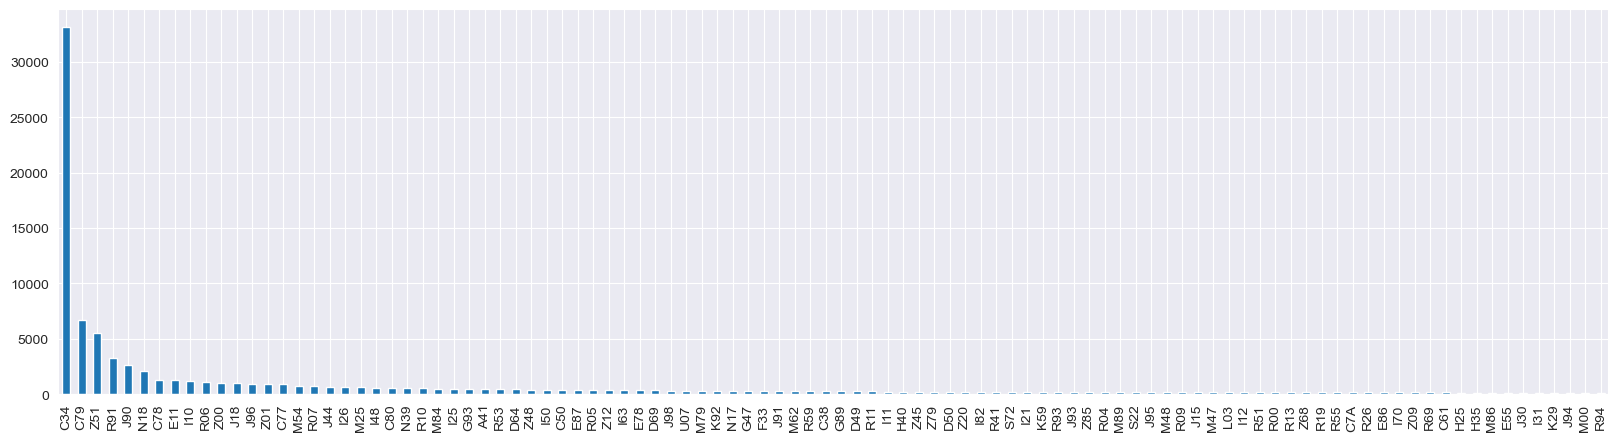

In [369]:
primary_diag_parent_count = medclms_df.primary_diag_parent_cd.value_counts()
plt.figure(figsize=(20,5))
primary_diag_parent_count[:100].plot.bar()
plt.show()

In [382]:
primary_diag_parent_count.sum()*0.01

1001.5600000000001

In [383]:
(pd.DataFrame([[diag_code, primary_diag_parent_count[diag_code]] for diag_code in primary_diag_parent_count.index if primary_diag_parent_count[diag_code]<1000])[1].sum())/primary_diag_parent_count.sum()

0.399177283437837

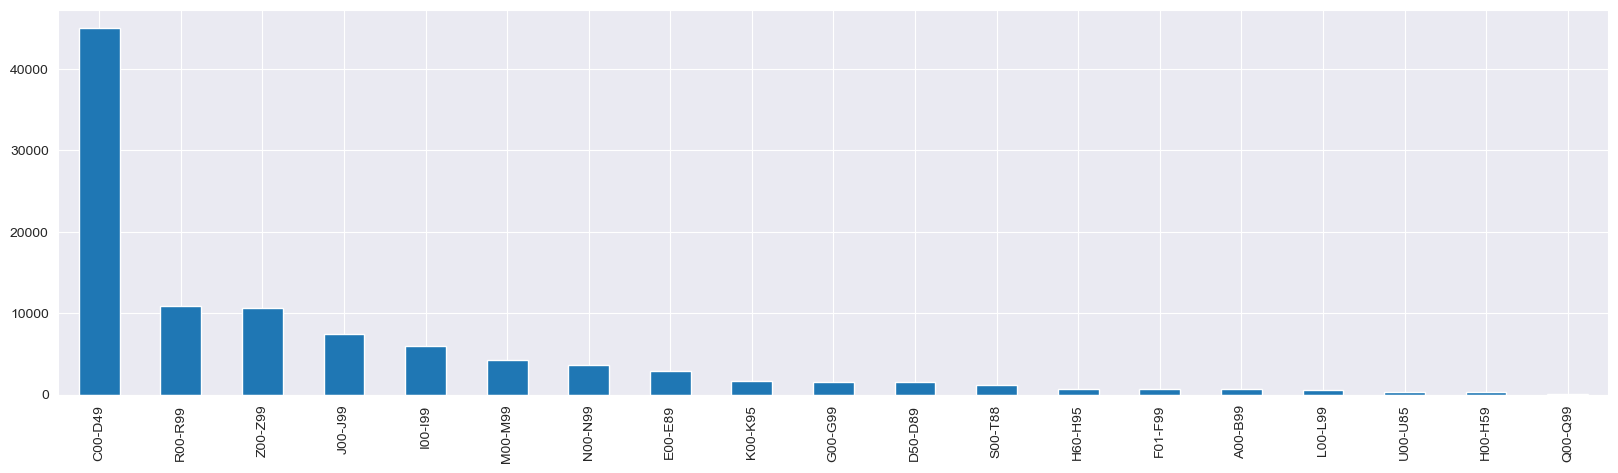

In [367]:
primary_diag_group_count = medclms_df.primary_diag_group_cd.value_counts()
plt.figure(figsize=(20,5))
primary_diag_group_count.plot.bar()
plt.show()

In [386]:
primary_diag_group_count.sum()*0.01

1001.5600000000001

In [387]:
(pd.DataFrame([[diag_code, primary_diag_group_count[diag_code]] for diag_code in primary_diag_group_count.index if primary_diag_group_count[diag_code]<1000])[1].sum())/primary_diag_parent_count.sum()

0.03370741643036863

### Sec Diagnosis : *diag_cd2-diag_cd9*

In [395]:
sec_diag_cols = ['diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5', 'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9',]

In [436]:
sec_diags = []
for col in sec_diag_cols:
    sec_diags.append(list(medclms_df[col]))
sec_diags = np.array(sec_diags).flatten()

In [442]:
sec_diags_count = pd.Series(sec_diags).value_counts()
sec_diags_count.shape

(2906,)

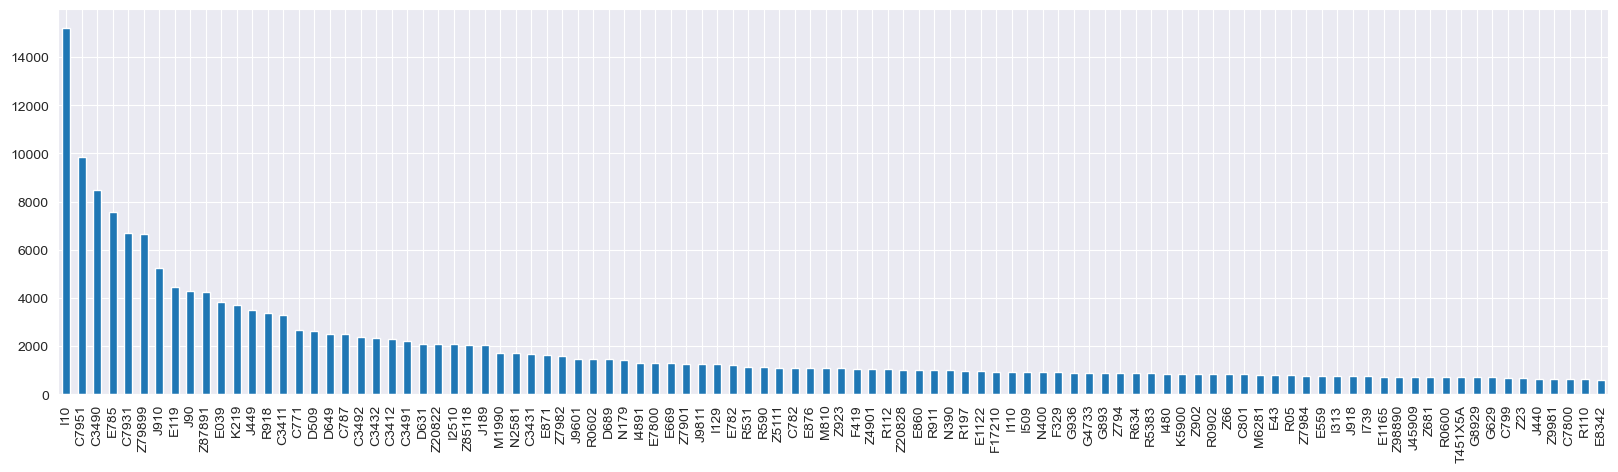

In [440]:
plt.figure(figsize=(20,5))
sec_diags_count[1:101].plot.bar()
plt.show()

In [451]:
medclms_df.columns

Index(['therapy_id', 'medclm_key', 'clm_unique_key', 'primary_diag_cd',
       'visit_date', 'diag_cd2', 'diag_cd3', 'diag_cd4', 'diag_cd5',
       'diag_cd6', 'diag_cd7', 'diag_cd8', 'diag_cd9', 'process_date',
       'reversal_ind', 'pot', 'util_cat', 'hedis_pot', 'clm_type',
       'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis',
       'fatigue_diagnosis', 'nausea_diagnosis', 'hyperglycemia_diagnosis',
       'constipation_diagnosis', 'diarrhea_diagnosis',
       'primary_diag_parent_cd', 'primary_diag_group_cd'],
      dtype='object')

In [453]:
medclms_df.to_pickle(f'{os.getcwd()}/medclms_train_new.pkl')